### 📘 Introduction

**AdEase** is a digital advertising and marketing company dedicated to helping businesses achieve **maximum clicks at minimal cost**. It provides a robust **ad infrastructure** that enables clients to promote their products and services **easily, effectively, and economically**.

To further enhance its targeting strategy, AdEase is analyzing **Wikipedia page view data** across multiple languages over a span of **550 days**. The goal is to forecast future page views to optimize **ad placements** and ensure better **ROI** for clients across different regions.

By leveraging the power of **data science** and **time series forecasting**, AdEase aims to predict user traffic on various Wikipedia pages segmented by language, enabling **data-driven ad placement** strategies.

---

### 🧠 What Is Expected?

As part of the **Data Science team** at AdEase, your role is to:

- Analyze the **per-page view reports** of Wikipedia pages across 550 days.
- Forecast the **number of future page views** using time series models.
- Optimize **ad placement** strategies for clients based on predicted traffic.
- Understand and communicate how **language-specific trends** affect ad performance.
- Work with a dataset consisting of **145,000 Wikipedia pages** and their **daily view counts**.
- Provide insights that help regional clients identify the best-performing languages and pages for their campaigns.

Your analysis will play a key role in shaping **AdEase’s targeting strategies**, allowing clients to run **smarter, more efficient ad campaigns** across global audiences.


In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import re

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the file into a pandas dataframe
df = pd.read_csv('train_1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
df.shape

(145063, 551)

In [5]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [6]:
df.nunique()

Page          145063
2015-07-01      6898
2015-07-02      6823
2015-07-03      6707
2015-07-04      6995
               ...  
2016-12-27      8938
2016-12-28      8819
2016-12-29      8761
2016-12-30      8733
2016-12-31      8826
Length: 551, dtype: int64

In [7]:
df.duplicated().value_counts()

False    145063
Name: count, dtype: int64

In [8]:
df.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [9]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [10]:
df.describe(include='object')

,Page
count,145063
unique,145063
top,2NE1_zh.wikipedia.org_all-access_spider
freq,1


Insight
- There are 145063 entries with 551 columns, i.e. 145063 wikipedia pages with views for 550 days
- There are null/missing values in each of the dates
- There are no duplicates
- There are 145063 unique wikipedia pages

In [11]:
# read the file containing flag for each date indicating if those dates had a campaign/significant event
exog_en = pd.read_csv('Exog_Campaign_eng.csv')

In [12]:
exog_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [13]:
exog_en.shape

(550, 1)

In [14]:
exog_en.isna().sum()

Exog    0
dtype: int64

In [15]:
exog_en.nunique()

Exog    2
dtype: int64

In [16]:
exog_en.duplicated().value_counts()

True     548
False      2
Name: count, dtype: int64

Insight
- There are 550 entries corresponding to 550 days in the previous dataset
- There are no null/missing values
- There are 2 unique values - 1 ans 0

In [17]:
df.columns[1:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

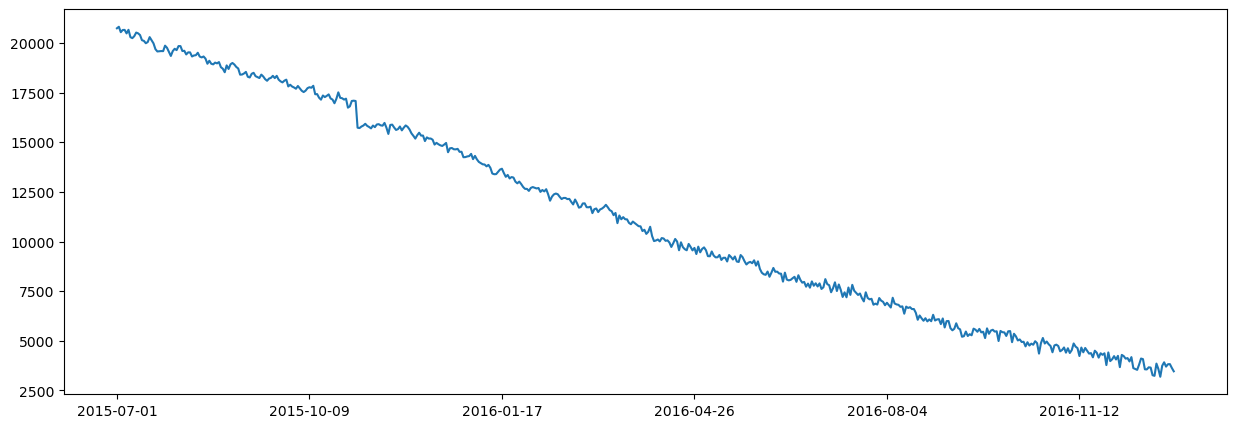

In [18]:
date_columns = df.columns[1:]
df[date_columns].isna().sum().plot(figsize=(15,5))
plt.show()

Insight
- It can be observed that the null values keep decreasing with dates, indicating that there were no views for these dates
- We can infer that the webpages which were lauched recently will not have view data prior to launch and hence can be filled with 0

In [19]:
df[date_columns] = df.loc[:,date_columns].fillna(0)

In [20]:
df.isna().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

### Extracting information from Page column

In [21]:
df['Page'].sample(10)

135204         UEFA欧州選手権_ja.wikipedia.org_all-access_spider
98906     Александр_II_ru.wikipedia.org_all-access_all-a...
48574     William_Shakespeare_de.wikipedia.org_all-acces...
128772    Meilleurs_buteurs_du_championnat_d'Espagne_de_...
72516            Thalía_es.wikipedia.org_desktop_all-agents
125017    Бербер,_Зоя_Рудольфовна_ru.wikipedia.org_all-a...
139371    DFL-Supercup_de.wikipedia.org_all-access_all-a...
132576      横浜DeNAベイスターズ_ja.wikipedia.org_all-access_spider
56604     この素晴らしい世界に祝福を!_ja.wikipedia.org_mobile-web_all...
83143     Extension:TreeAndMenu_www.mediawiki.org_all-ac...
Name: Page, dtype: object

The page name contains data in the below format:
SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN
having information about page name, thn domain, device type used to access t e page, aso the request origin(spider or browser age 2.

#### Extracting name

In [22]:
def extract_name(page):
    pattern = r'(.{0,})_(.{2}).wikipedia.org_'
    result = re.findall(pattern, page)
    if len(result) == 1:
        return result[0][0]
    else:
        return 'unknown'
df['name'] = df['Page'].apply(extract_name)

#### Extracting language

In [23]:
def extract_lang(page):
    pattern = r'(.{0,})_(.{2}).wikipedia.org_'
    result = re.findall(pattern, page)
    if len(result) == 1:
        return result[0][1]
    else:
        return 'un'
df['language'] = df['Page'].apply(extract_lang)
print(df['language'].unique())

['zh' 'fr' 'en' 'un' 'ru' 'de' 'ja' 'es']


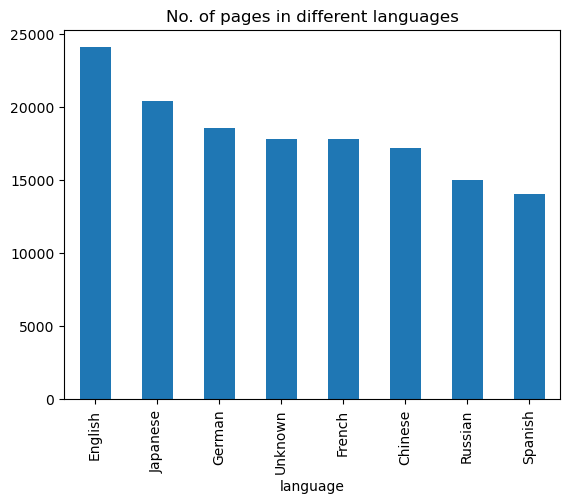

% of pages in different languages


language
English     16.62
Japanese    14.08
German      12.79
Unknown     12.31
French      12.27
Chinese     11.88
Russian     10.36
Spanish      9.70
Name: proportion, dtype: float64

In [24]:
lang_name_mapping={'zh':'Chinese', 'fr':'French', 'en':'English',
                   'un':'Unknown', 'ru':'Russian', 'de':'German',
                   'ja':'Japanese', 'es':'Spanish'}
df['language'] = df['language'].map(lang_name_mapping)
df['language'].value_counts().plot(kind='bar', title='No. of pages in different languages')
plt.show()
print("% of pages in different languages")
round(df['language'].value_counts(normalize=True)*100,2)

Insight
- Maximum number of pages, 16.62%, are in English language

#### Extracting access type

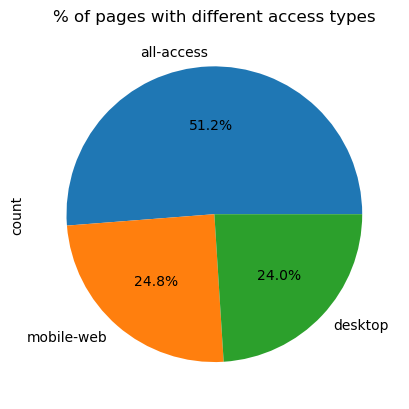

In [25]:
df['access_type'] = df['Page'].str.findall(r'all-access|mobile-web|desktop').apply(lambda x: x[0])
df['access_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='% of pages with different access types')
plt.show()

Insight
 - Maximum number of pages, 51.2%, have all-access access type

#### Extracting access origin

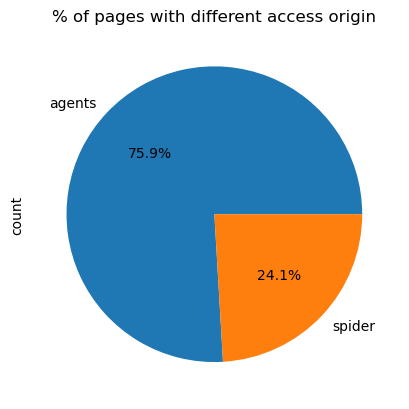

In [26]:
df['access_origin'] = df['Page'].str.findall(r'spider|agents').apply(lambda x: x[0])
df['access_origin'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='% of pages with different access origin')
plt.show()

Insight
- Maximum number of pages, 75.9%, have agents access origin

###  Aggregate and Pivoting

In [27]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,name,language,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,Chinese,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,Chinese,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,Chinese,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,Chinese,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,Chinese,all-access,spider


In [28]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', 'name', 'language', 'access_type', 'access_origin'],
      dtype='object', length=555)

In [29]:
df_agg = df.drop(columns=['Page', 'name', 'access_type', 'access_origin']).groupby('language').mean().T.reset_index()
df_agg['index'] = pd.to_datetime(df_agg['index'])
df_agg = df_agg.set_index('index')
df_agg.head()

language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
index,,,,,,,,
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919,83.479922
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557,87.471857
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680,82.680538
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750,70.572557
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210,78.214562


####  Time series plots for all languages

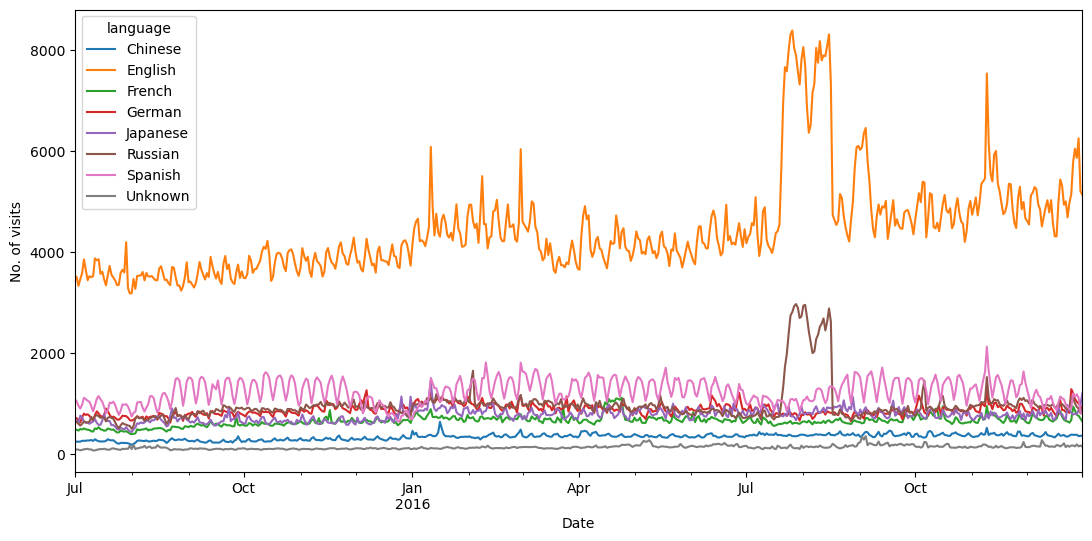

In [30]:
df_agg.plot(figsize=(13,6))
plt.xlabel('Date')
plt.ylabel('No. of visits')
plt.show()

Insight
- English pages are the most visited pages follwed by Spanish
- English pages have an upward trend in terms of visits
- There is an unusual peak from mid of July to end of August 2016

###  Stationarity, Detrending, ACF and PACF

####  Stationarity test

Using Augmented Dickey-Fuller test to check for stationarity

- H0: The series is not stationary
- H1: The series is stationary

In [31]:
def adfuller_test(time_series):
    p_value = sm.tsa.stattools.adfuller(time_series)[1]
    if(p_value < 0.05):
        print('The time series is stationary')
    else:
        print('The time series is not stationary')

In [32]:
for lang in df_agg.columns:
    print(lang)
    adfuller_test(df_agg[lang])
    print()

Chinese
The time series is not stationary

English
The time series is not stationary

French
The time series is not stationary

German
The time series is not stationary

Japanese
The time series is not stationary

Russian
The time series is stationary

Spanish
The time series is stationary

Unknown
The time series is stationary



Insight
- Based on the Augmented Dickey-Fuller test, the time series corresponding to Russian and Spanish language page visits are stationary
- The time series corresponding to Chinese, English, French, German and Japanese language page visits are not stationary

In [33]:
ts_english = df_agg['English']

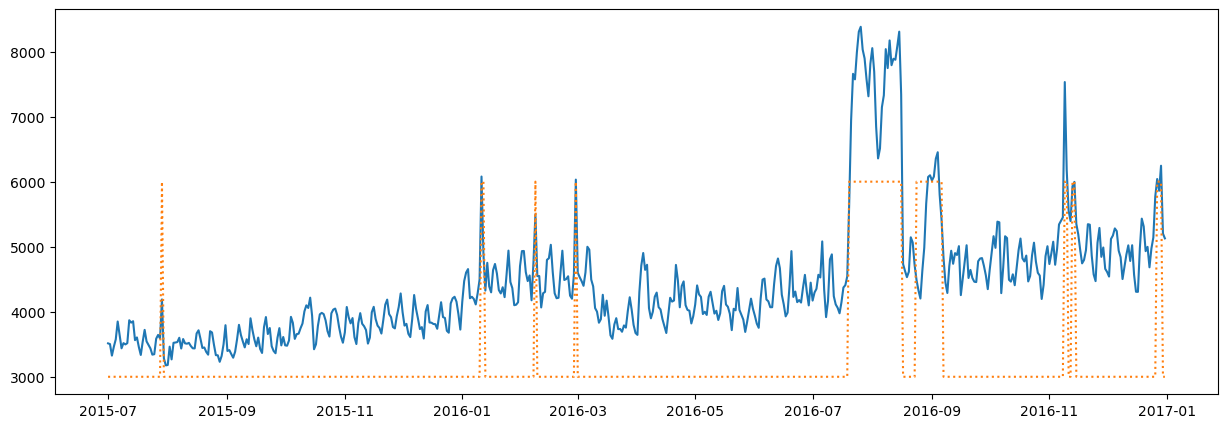

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ts_english.index, ts_english)
ax.plot(ts_english.index, (exog_en+1)*3000, ':')
plt.show()

Insight
- It is very clear from the above plot that the time series looks like an additive time series with linear up trend and linear sesonality
- The unusual spikes in the visits are due to the special events marked by the orange peaks

#### De-trending and De-seasoning

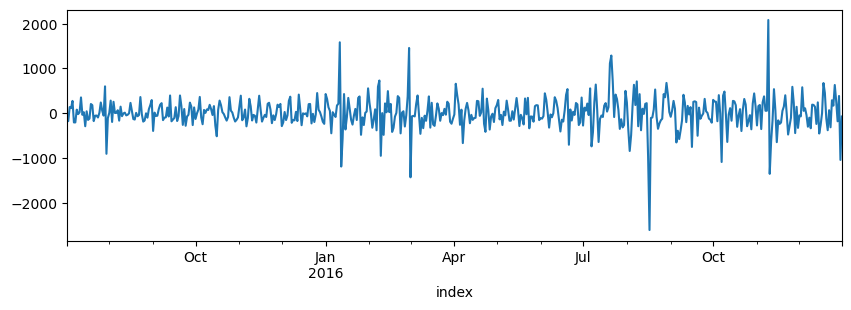

In [35]:
ts_english.diff(1).dropna().plot(figsize=(10,3))
plt.show()

In [36]:
adfuller_test(ts_english.diff(1).dropna())

The time series is stationary


The time series is stationary
The time series became stationary by just doing first-order differencing, hence d=1
Let's now look at the seasonality

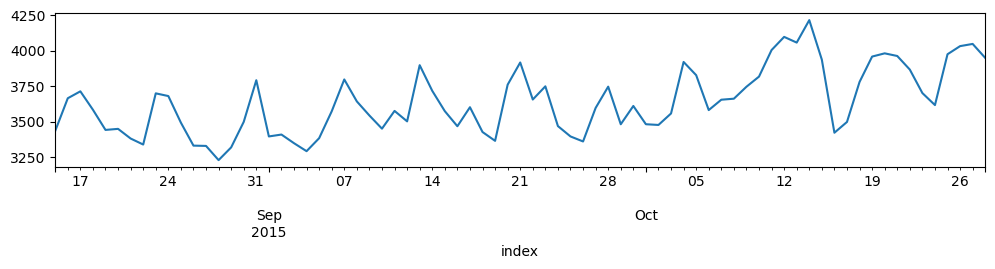

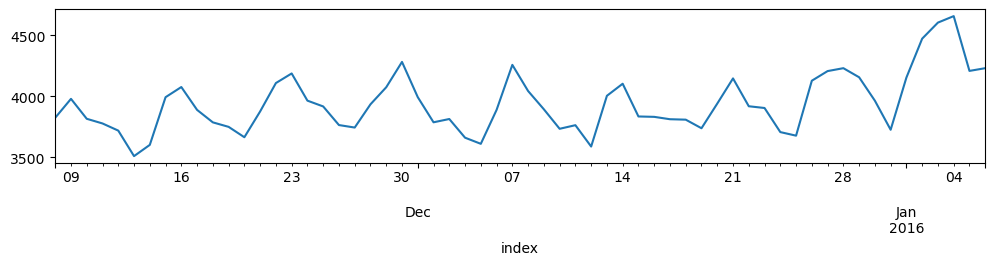

In [37]:
ts_english[45:120].plot(figsize=(12,2))
plt.show()
ts_english[130:190].plot(figsize=(12,2))
plt.show()

- Observing the above two plots, we can conclude that there is a seasonality of 7 days. So s=7
- The peaks and troughs repeat every 7 days

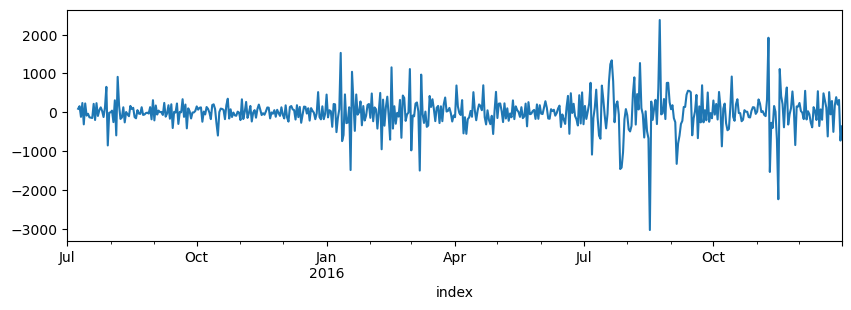

In [38]:
ts_english.diff(1).diff(7).plot(figsize=(10,3))
plt.show()

In [39]:
adfuller_test(ts_english.diff(1).diff(7).dropna())

The time series is stationary


- The time series is stationary after manually removing the trend and, if needed, the seasonality.  
- The Augmented Dickey-Fuller (ADF) test confirms stationarity of the transformed series.

####  Auto de-composition

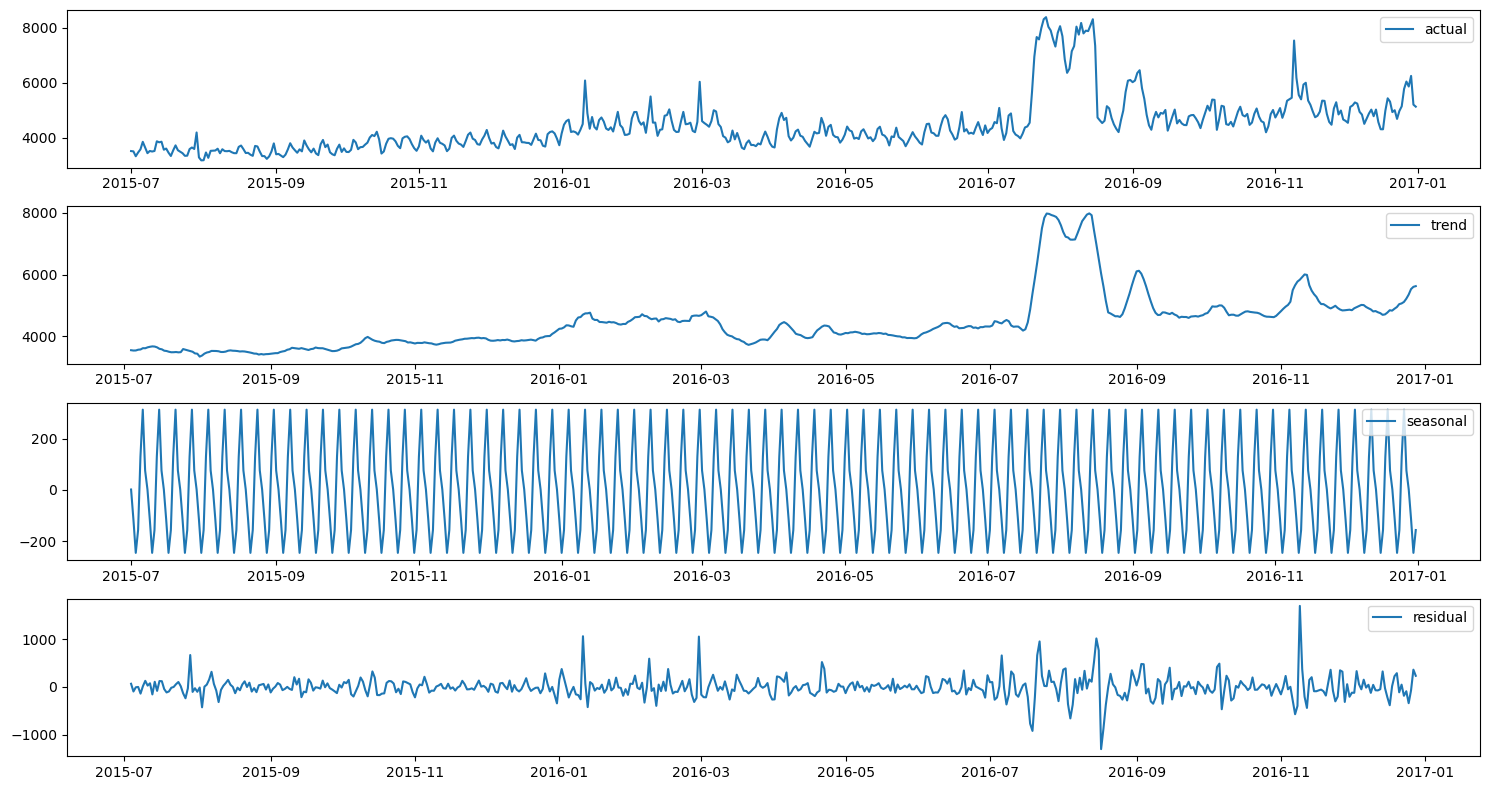

In [40]:
decom = seasonal_decompose(ts_english)
ts_english_trend = decom.trend
ts_english_seas = decom.seasonal
ts_english_res = decom.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(ts_english, label='actual')
plt.legend()
plt.subplot(412)
plt.plot(ts_english_trend, label='trend')
plt.legend()
plt.subplot(413)
plt.plot(ts_english_seas, label='seasonal')
plt.legend()
plt.subplot(414)
plt.plot(ts_english_res, label='residual')
plt.legend()
plt.tight_layout()
plt.show()

#### ACF and PACF plots

- The ACF plot shows the correlation of a time series with itself at different lags, while the PACF plot shows the correlation of a time series with itself at different lags, after removing the effects of the previous lags
- The ACF plot can be used to identify the order of an AR model. The order of an AR model is the number of lags that are included in the model. The ACF plot will show spikes at the lags that are included in the model.
- The PACF plot can be used to identify the order of an MA model. The order of an MA model is the number of lags that are included in the model. The PACF plot will show spikes at the lags that are included in the model
Note: Stationary data needs to be provided to the ACF and PACF plots

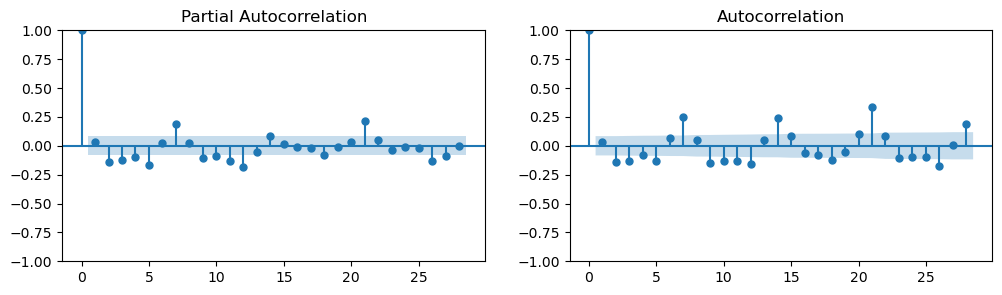

In [41]:
fig, axs = plt.subplots(1,2, figsize=(12, 3))
plot_pacf(ax=axs[0], x=ts_english.diff(1).dropna())
plot_acf(ax=axs[1], x=ts_english.diff(1).dropna())
plt.show()

- From the PACF plot, we can see that there are 3 significant lags, at 5, 7 and 21. So P=1,2 or 3
- From the ACF plot, we can see that there are 3 significant lags, at 7, 14 and 21. So Q=1,2 or 3
- From the PACF plot, the cut-off is right from lag 0 and same for ACF plot. hence, p and q = 0 or 1

### Model building and Evaluation

In [42]:

# Creating a function to print values of all these metrics.
def performance(actual, predicted, print_metrics=True):
    MAE = round(mae(actual, predicted), 3)
    RMSE = round(mse(actual, predicted)**0.5, 3)
    MAPE = round(mape(actual, predicted), 3)
    if(print_metrics==True):
        print('MAE :', MAE)
        print('RMSE :', RMSE)
        print('MAPE:', MAPE)
    return MAE, RMSE, MAPE

####  ARIMA model

In [43]:
TS = ts_english.copy(deep=True)

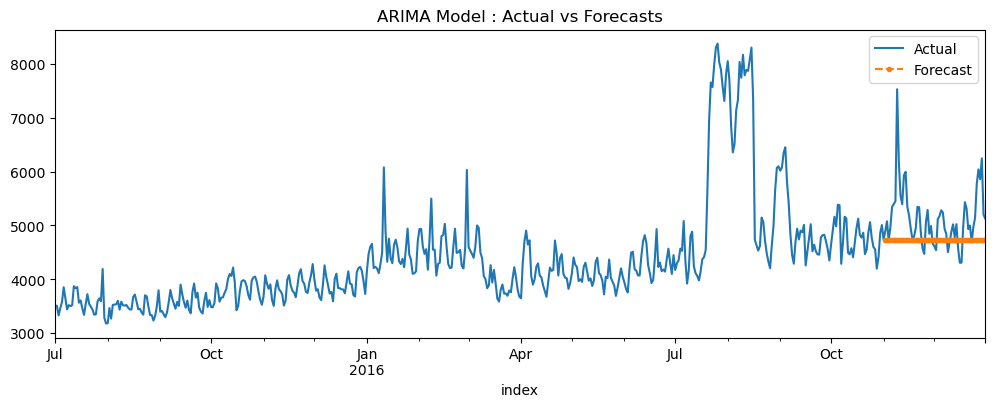

MAE : 477.636
RMSE : 672.778
MAPE: 0.086


In [44]:
n_forecast = 60
model = ARIMA(TS[:-n_forecast], order = (0,1,0))
model = model.fit()
predicted = model.forecast(steps= n_forecast, alpha = 0.05)
plt.figure(figsize=(12,4))
TS.plot(label = 'Actual')
predicted.plot(label = 'Forecast', linestyle='dashed', marker='.')
plt.legend(loc="upper right")
plt.title('ARIMA Model : Actual vs Forecasts')
plt.show()
(_,_,_) = performance(TS.values[-n_forecast:], predicted.values, print_metrics=True)

Insight
 - The model is not doing a good job, even for different combinations of p and q

#### SARIMAX model

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

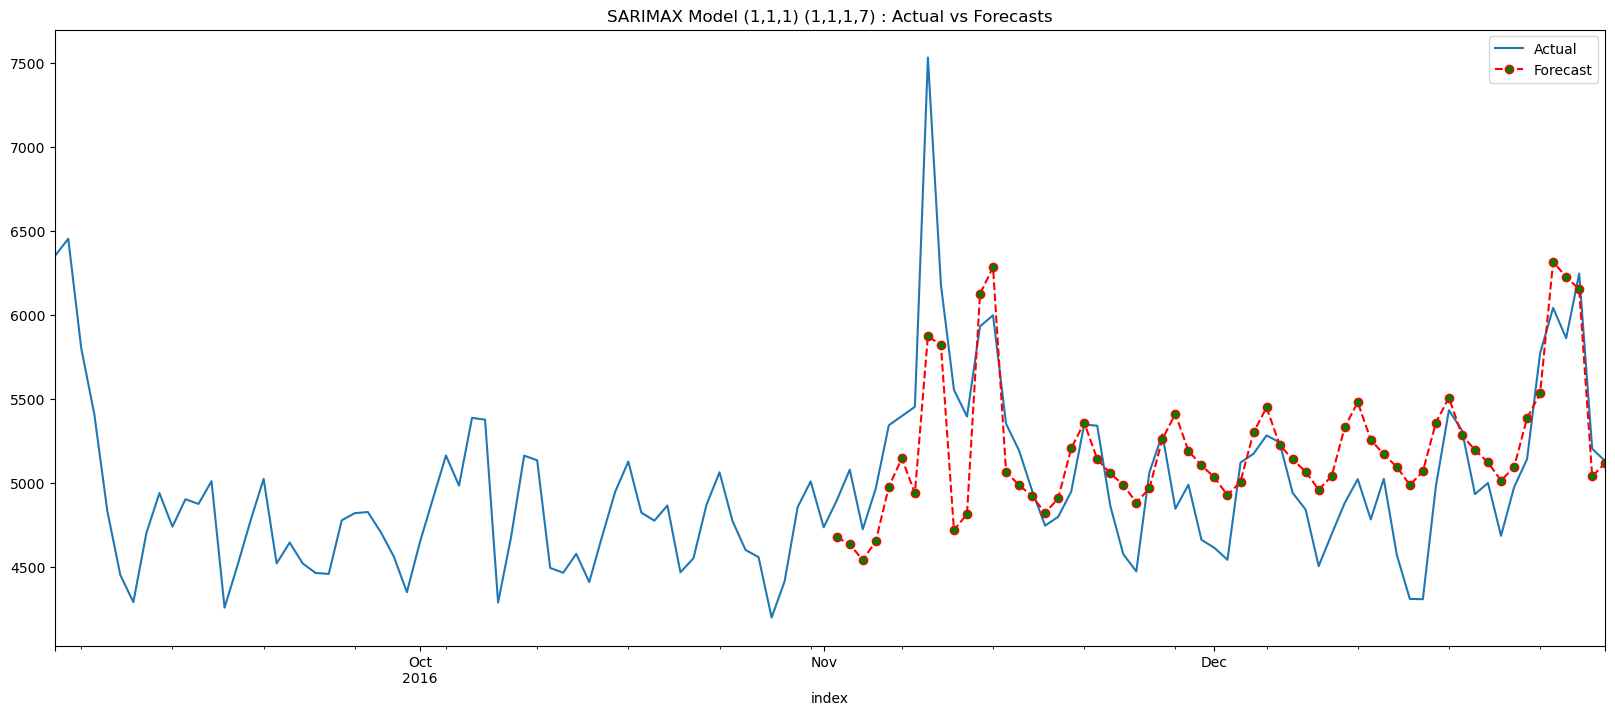

MAE : 306.417
RMSE : 399.016
MAPE: 0.06


In [46]:
exog = exog_en['Exog'].to_numpy()
p,d,q,P,D,Q,s = 1,1,1,1,1,1,7
n_forecast = 60
model = SARIMAX(TS[:-n_forecast], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n_forecast], initialization='approximate_diffuse')
model_fit = model.fit()
#Creating forecast for last n-values
model_forecast = model_fit.forecast(n_forecast, dynamic = True, exog = pd.DataFrame(exog[-n_forecast:]))

plt.figure(figsize = (20,8))
TS[-120:].plot(label = 'Actual')
model_forecast[-120:].plot(label = 'Forecast', color = 'red', linestyle='dashed', marker='o',markerfacecolor='green')
plt.legend(loc="upper right")
plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts')
plt.show()

(_,_,_) = performance(TS.values[-n_forecast:], model_forecast.values, print_metrics=True)

Insight
- SARIMAX model is doing a significantly better job. We need to search for the right order values

In [47]:
def SARIMAX_search(TS, forecast, p_list, d_list, q_list, P_list, D_list, Q_list, s_list, exog=[]):
    counter = 0
    #perf_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse', 'aic', 'bic'])
    perf_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse'])

    for p in p_list:
        for d in d_list:
            for q in q_list:
                for P in P_list:
                    for D in D_list:
                        for Q in Q_list:
                            for s in s_list:
                                try:
                                    model = SARIMAX(TS[:-n_forecast], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n_forecast], initialization='approximate_diffuse')
                                    model_fit = model.fit()
                                    model_forecast = model_fit.forecast(n_forecast, dynamic = True, exog = pd.DataFrame(exog[-n_forecast:]))
                                    MAE, RMSE, MAPE = performance(TS.values[-n_forecast:], model_forecast.values, print_metrics=False)
                                    counter += 1
                                    #list_row = [counter, (p,d,q), (P,D,Q,s), MAPE, RMSE, model_fit.aic, model_fit.bic]
                                    list_row = [counter, (p,d,q), (P,D,Q,s), MAPE, RMSE]
                                    perf_df.loc[len(perf_df)] = list_row
                                    print(f'Combination {counter} out of {(len(p_list)*len(d_list)*len(q_list)*len(P_list)*len(D_list)*len(Q_list)*len(s_list))}')
                                except:
                                    continue
    return perf_df

In [48]:
if 0:
    TS = ts_english.copy(deep=True)
    n_forecast = 60
    p_list = [0,1]
    d_list = [1]
    q_list = [0,1]
    P_list = [2,3]
    D_list = [1]
    Q_list = [2,3]
    s_list = [7]
    exog = exog_en['Exog'].to_numpy()
    perf_df = SARIMAX_search(TS, n_forecast, p_list, d_list, q_list, P_list, D_list, Q_list, s_list, exog)
    perf_df.sort_values(['mape', 'rmse'])

After the above experiment, p,d,q,P,D,Q,s = 1,1,1,2,1,3,7 were found to be best values with low mape

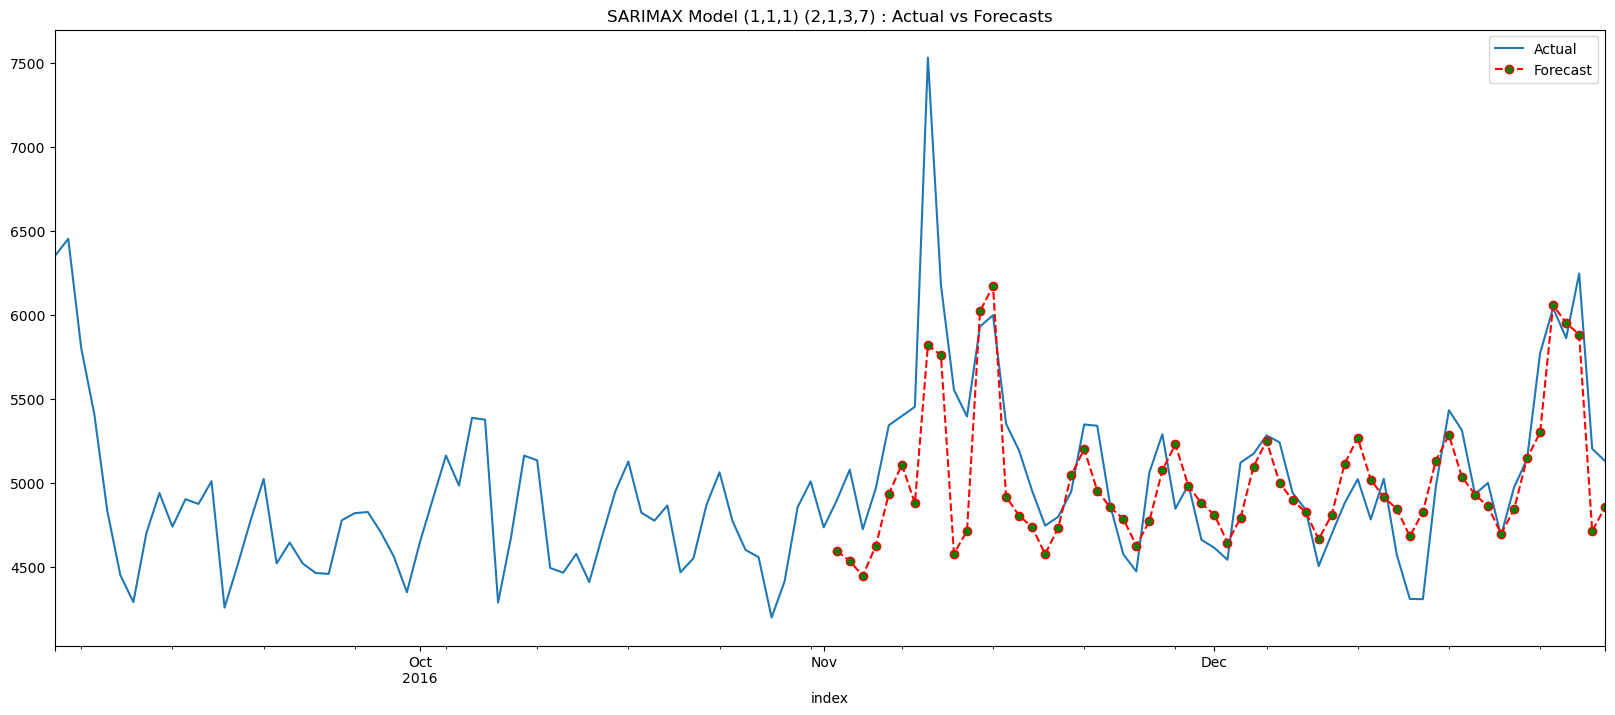

MAE : 267.666
RMSE : 376.001
MAPE: 0.05


In [49]:
exog = exog_en['Exog'].to_numpy()
p,d,q,P,D,Q,s = 1,1,1,2,1,3,7
n_forecast = 60
model = SARIMAX(TS[:-n_forecast], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n_forecast], initialization='approximate_diffuse')
model_fit = model.fit()
#Creating forecast for last n-values
model_forecast = model_fit.forecast(n_forecast, dynamic = True, exog = pd.DataFrame(exog[-n_forecast:]))

plt.figure(figsize = (20,8))
TS[-120:].plot(label = 'Actual')
model_forecast[-120:].plot(label = 'Forecast', color = 'red', linestyle='dashed', marker='o',markerfacecolor='green')
plt.legend(loc="upper right")
plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts')
plt.show()

(_,_,_) = performance(TS.values[-n_forecast:], model_forecast.values, print_metrics=True)

Insight
 - There is good improvement in the SARIMAX model after tuning the parameters

####  Facebook Prophet

In [50]:
#!pip install pystan~=2.14 prophet

In [51]:
TS = ts_english.copy(deep=True).reset_index()
TS = TS[['index', 'English']]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
exog = exog_en['Exog']
TS['exog'] = exog.values
TS.tail()

,ds,y,exog
545,2016-12-27,6040.680728,1
546,2016-12-28,5860.227559,1
547,2016-12-29,6245.127510,1
548,2016-12-30,5201.783018,0
549,2016-12-31,5127.916418,0


In [52]:
from prophet import Prophet
my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.add_regressor('exog')
n_forecast = 60
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
future_dates['exog'] = TS['exog']
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

17:10:04 - cmdstanpy - INFO - Chain [1] start processing
17:10:04 - cmdstanpy - INFO - Chain [1] done processing


MAE : 287.499
RMSE : 441.92
MAPE: 0.06


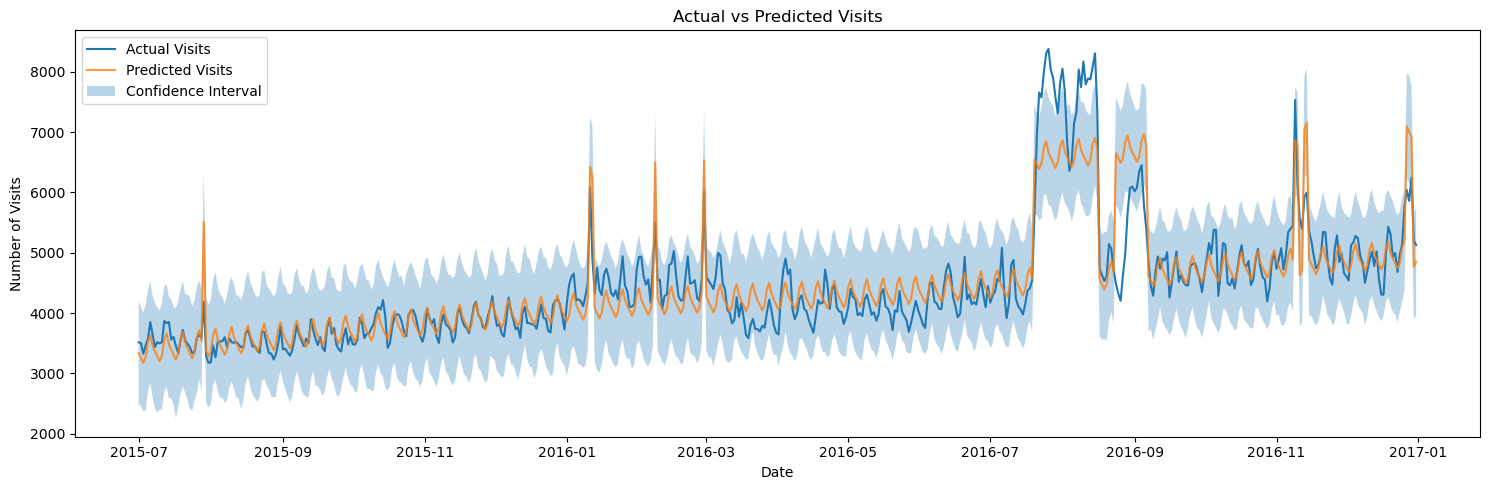

In [53]:
# Convert datetime values to numeric format (timestamps) for fill_between
TS['ds'] = pd.to_datetime(TS['ds'])
# 2) Coerce bounds to float
TS['yhat_lower'] = pd.to_numeric(TS['yhat_lower'], errors='coerce')
TS['yhat_upper'] = pd.to_numeric(TS['yhat_upper'], errors='coerce')
# 3) Mask out any NaNs
mask = TS['yhat_lower'].notna() & TS['yhat_upper'].notna()

# 4) Plot
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', alpha=0.8)

# Extract the filtered data to numpy arrays first
x_dates = TS.loc[mask, 'ds'].values
lower_bound = TS.loc[mask, 'yhat_lower'].values
upper_bound = TS.loc[mask, 'yhat_upper'].values

# Now use fill_between with the numpy arrays
plt.fill_between(
    x_dates,
    lower_bound,
    upper_bound,
    alpha=0.3,
    label='Confidence Interval'
)

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.tight_layout()
plt.show()

Insight
 - Phropet is doing an incredible job capturing the trend and unusual peaks. It is also capturing the seasonality very well

###  Comparison

####  Chinese

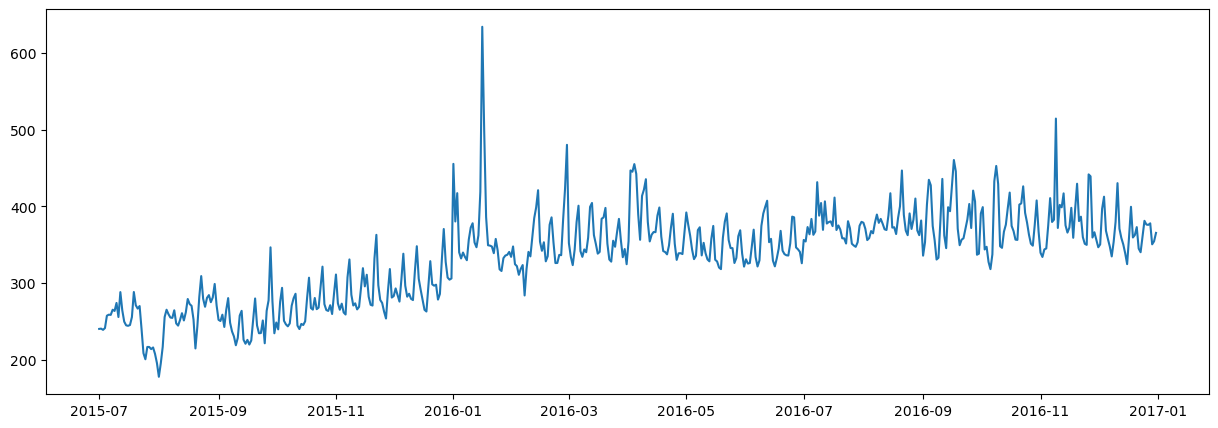

17:10:06 - cmdstanpy - INFO - Chain [1] start processing
17:10:06 - cmdstanpy - INFO - Chain [1] done processing


MAE : 19.352
RMSE : 28.702
MAPE: 0.058


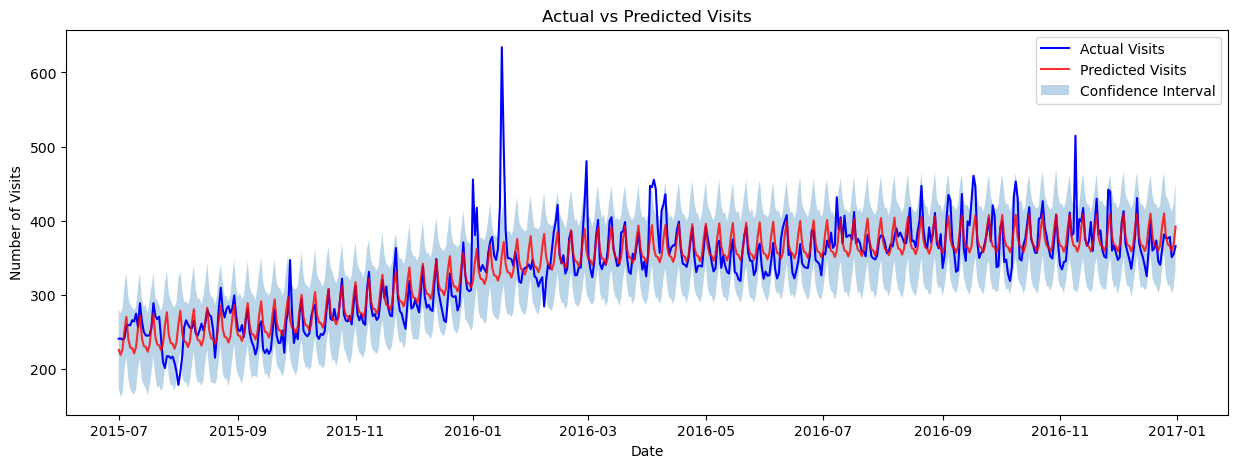

In [54]:
lang = 'Chinese'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

plt.figure(figsize=(15, 5))

# Convert all data to numpy arrays
x_dates = mdates.date2num(TS['ds'].values)
y_actual = TS['y'].values
y_pred = TS['yhat'].values
y_lower = TS['yhat_lower'].values
y_upper = TS['yhat_upper'].values

# Plot using numpy arrays
plt.plot_date(x_dates, y_actual, 'b-', label='Actual Visits')
plt.plot_date(x_dates, y_pred, 'r-', alpha=0.8, label='Predicted Visits')
plt.fill_between(x_dates, y_lower, y_upper, alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

#### French

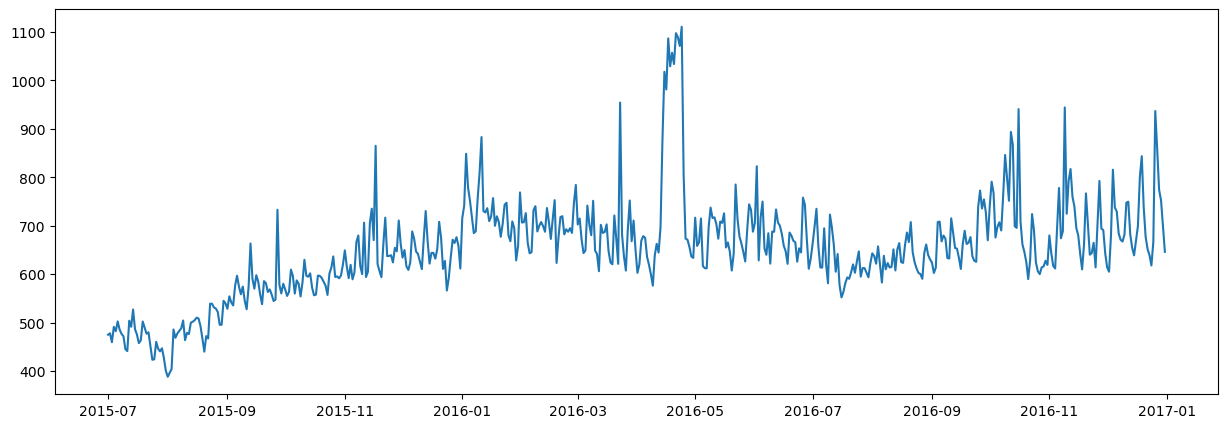

17:10:08 - cmdstanpy - INFO - Chain [1] start processing
17:10:08 - cmdstanpy - INFO - Chain [1] done processing


MAE : 42.004
RMSE : 68.664
MAPE: 0.061


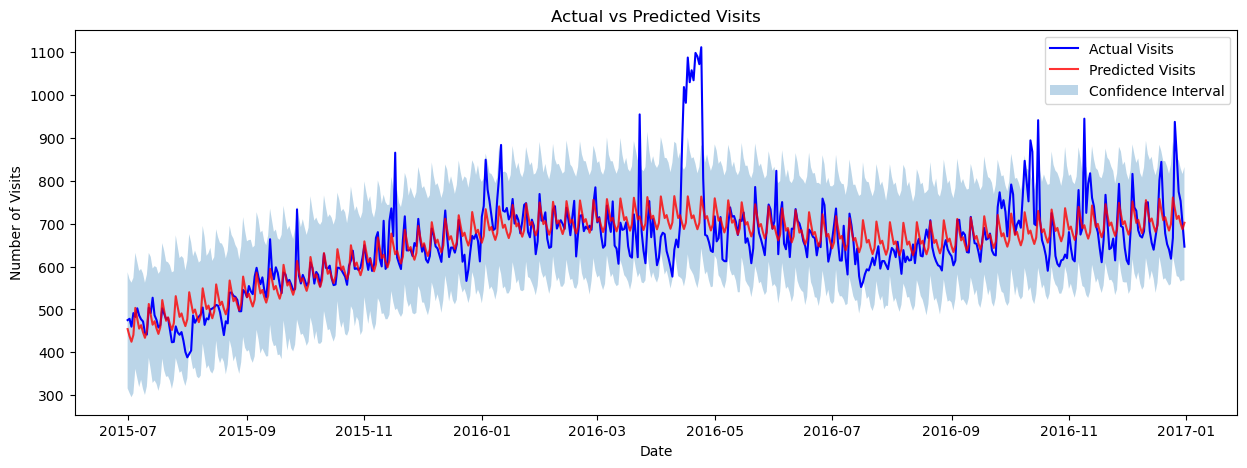

In [55]:
lang = 'French'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

plt.figure(figsize=(15, 5))

# Convert all data to numpy arrays
x_dates = mdates.date2num(TS['ds'].values)
y_actual = TS['y'].values
y_pred = TS['yhat'].values
y_lower = TS['yhat_lower'].values
y_upper = TS['yhat_upper'].values

# Plot using numpy arrays
plt.plot_date(x_dates, y_actual, 'b-', label='Actual Visits')
plt.plot_date(x_dates, y_pred, 'r-', alpha=0.8, label='Predicted Visits')
plt.fill_between(x_dates, y_lower, y_upper, alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

#### German

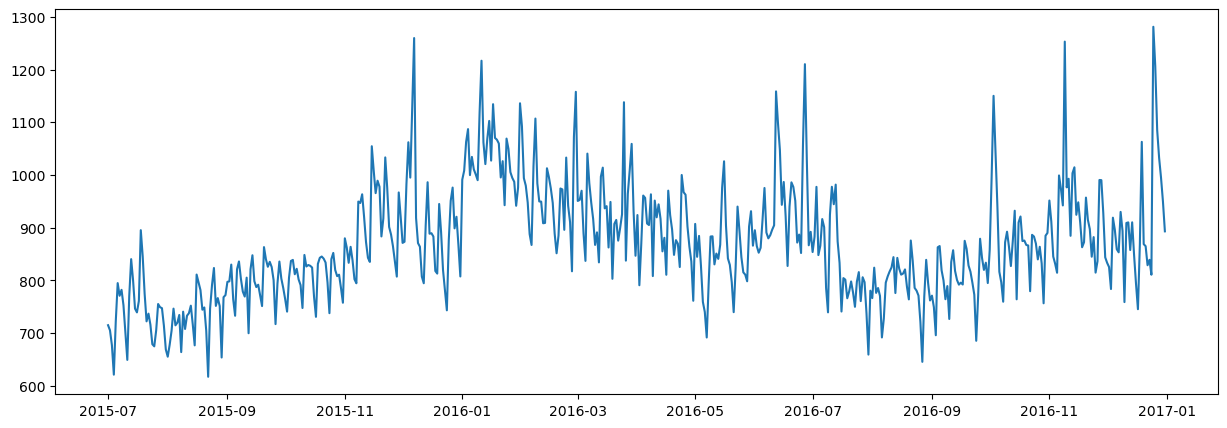

17:10:09 - cmdstanpy - INFO - Chain [1] start processing
17:10:09 - cmdstanpy - INFO - Chain [1] done processing


MAE : 49.367
RMSE : 68.284
MAPE: 0.055


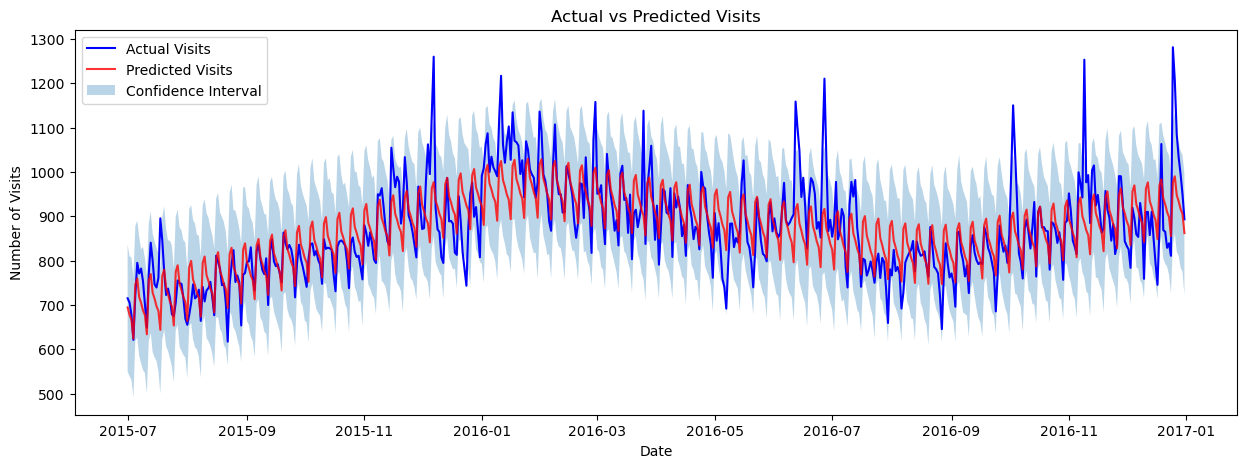

In [56]:
lang = 'German'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

plt.figure(figsize=(15, 5))

# Convert all data to numpy arrays
x_dates = mdates.date2num(TS['ds'].values)
y_actual = TS['y'].values
y_pred = TS['yhat'].values
y_lower = TS['yhat_lower'].values
y_upper = TS['yhat_upper'].values

# Plot using numpy arrays
plt.plot_date(x_dates, y_actual, 'b-', label='Actual Visits')
plt.plot_date(x_dates, y_pred, 'r-', alpha=0.8, label='Predicted Visits')
plt.fill_between(x_dates, y_lower, y_upper, alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

#### Japanese

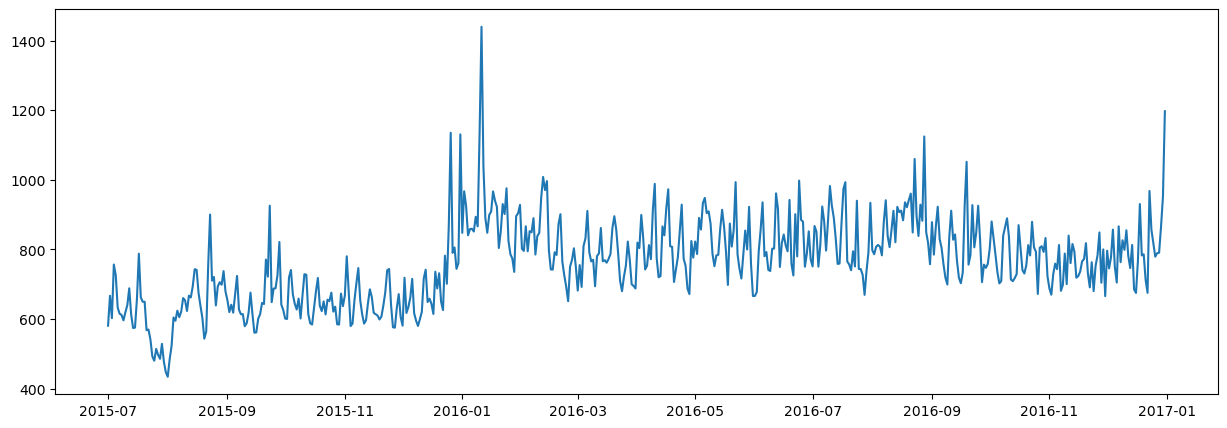

17:10:11 - cmdstanpy - INFO - Chain [1] start processing
17:10:11 - cmdstanpy - INFO - Chain [1] done processing


MAE : 61.17
RMSE : 84.08
MAPE: 0.08


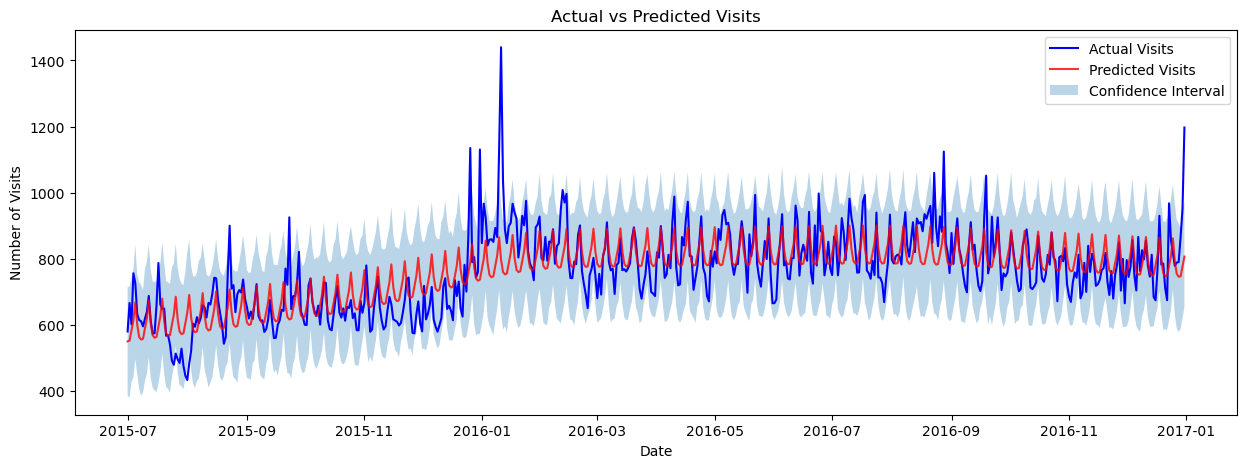

In [57]:
lang = 'Japanese'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

plt.figure(figsize=(15, 5))

# Convert all data to numpy arrays
x_dates = mdates.date2num(TS['ds'].values)
y_actual = TS['y'].values
y_pred = TS['yhat'].values
y_lower = TS['yhat_lower'].values
y_upper = TS['yhat_upper'].values

# Plot using numpy arrays
plt.plot_date(x_dates, y_actual, 'b-', label='Actual Visits')
plt.plot_date(x_dates, y_pred, 'r-', alpha=0.8, label='Predicted Visits')
plt.fill_between(x_dates, y_lower, y_upper, alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

#### Russian

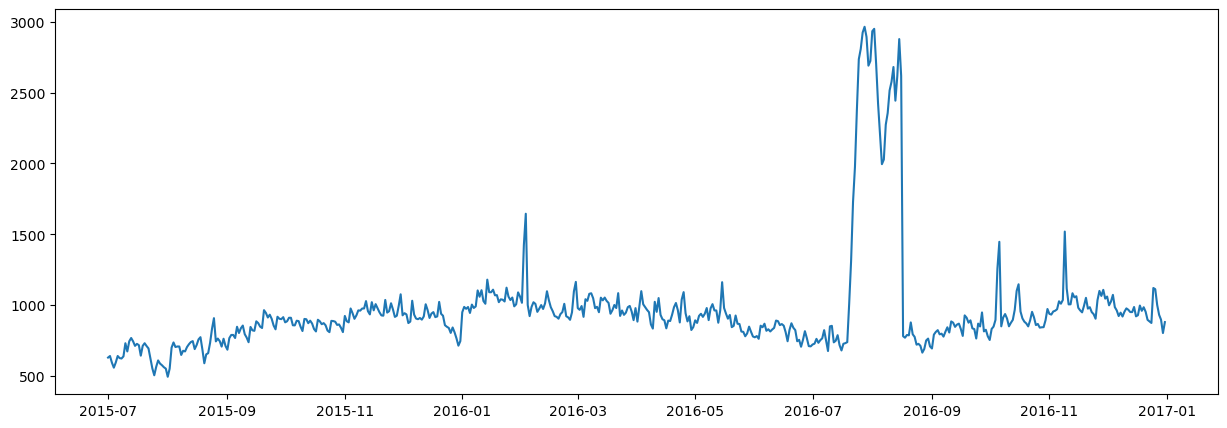

17:10:12 - cmdstanpy - INFO - Chain [1] start processing
17:10:12 - cmdstanpy - INFO - Chain [1] done processing


MAE : 185.548
RMSE : 353.401
MAPE: 0.169


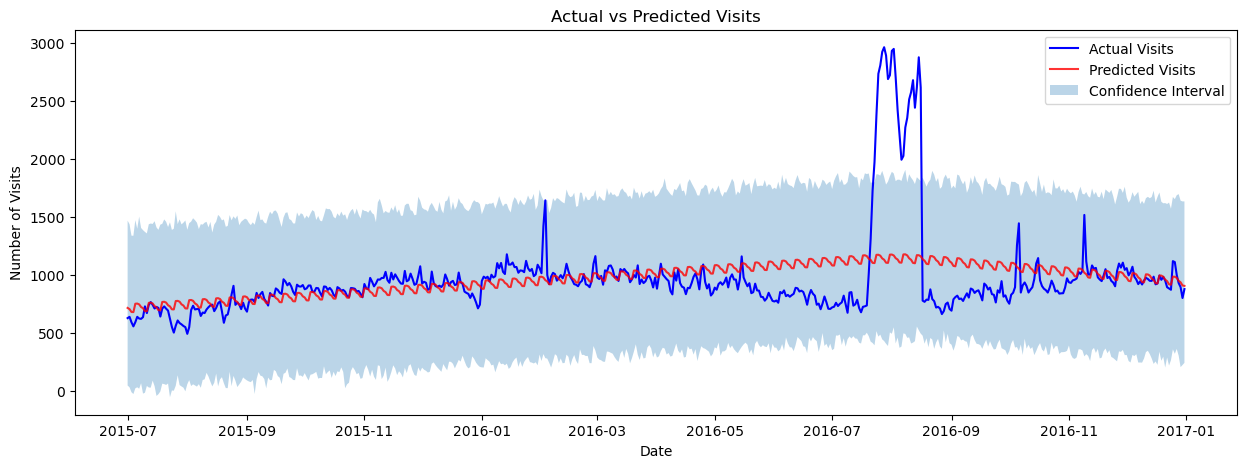

In [58]:
lang = 'Russian'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

plt.figure(figsize=(15, 5))

# Convert all data to numpy arrays
x_dates = mdates.date2num(TS['ds'].values)
y_actual = TS['y'].values
y_pred = TS['yhat'].values
y_lower = TS['yhat_lower'].values
y_upper = TS['yhat_upper'].values

# Plot using numpy arrays
plt.plot_date(x_dates, y_actual, 'b-', label='Actual Visits')
plt.plot_date(x_dates, y_pred, 'r-', alpha=0.8, label='Predicted Visits')
plt.fill_between(x_dates, y_lower, y_upper, alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

#### Spanish

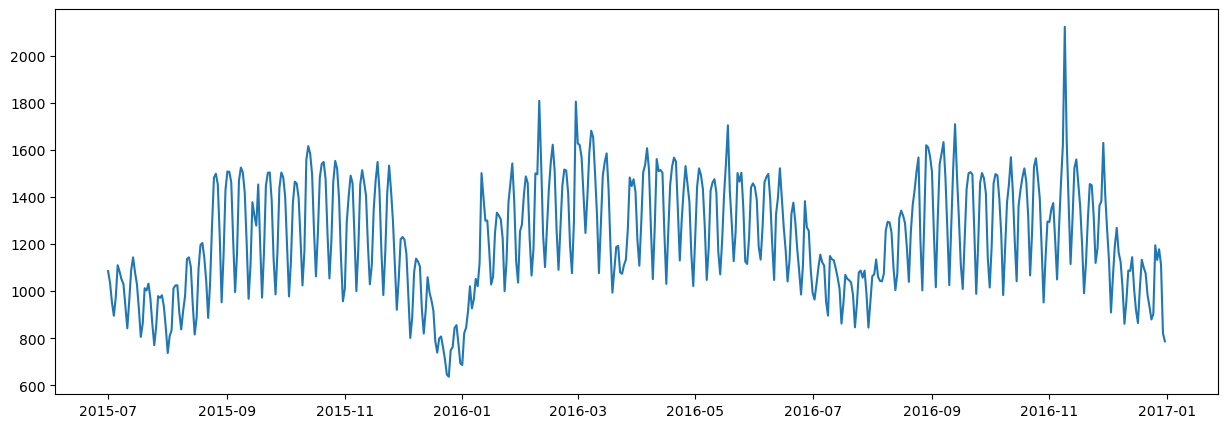

17:10:14 - cmdstanpy - INFO - Chain [1] start processing
17:10:14 - cmdstanpy - INFO - Chain [1] done processing


MAE : 131.112
RMSE : 170.643
MAPE: 0.115


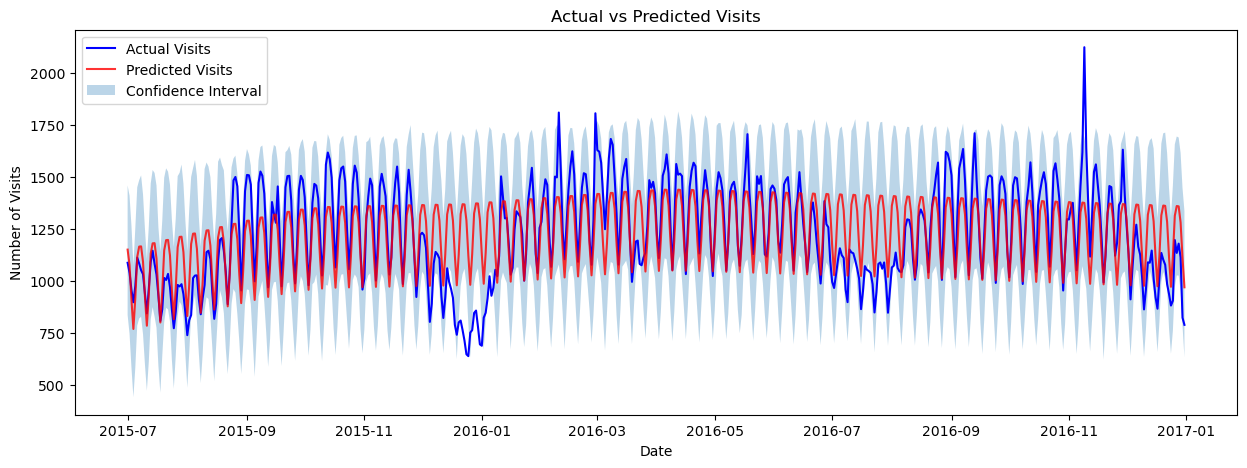

In [59]:
lang = 'Spanish'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

plt.figure(figsize=(15, 5))

# Convert all data to numpy arrays
x_dates = mdates.date2num(TS['ds'].values)
y_actual = TS['y'].values
y_pred = TS['yhat'].values
y_lower = TS['yhat_lower'].values
y_upper = TS['yhat_upper'].values

# Plot using numpy arrays
plt.plot_date(x_dates, y_actual, 'b-', label='Actual Visits')
plt.plot_date(x_dates, y_pred, 'r-', alpha=0.8, label='Predicted Visits')
plt.fill_between(x_dates, y_lower, y_upper, alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

### 📊 Result Interpretation

* The dataset contains pages in **7 known languages**: **English, Japanese, German, French, Chinese, Russian**, and **Spanish**.

* **English** has the highest number of pages, accounting for **16.62%** of the total. This is expected as English is one of the most widely spoken languages globally.

* Time series data can be broken down using **decomposition** to reveal its **trend**, **seasonality**, and **residual (error)** components.

* For the **English** language time series:
  * A **first-order differencing** is enough to make the series **stationary**.
  * This has been confirmed using the **Augmented Dickey-Fuller (ADF) test**.

* The analysis shows an **unusual spike in page visits** whenever the **exogenous variable = 1**, indicating a significant external impact.

* Without exogenous variables, prediction accuracy **drops noticeably**, as observed in the plots for other languages that do not include such variables.

* **AdEase** can significantly improve its forecasting by:
  * Incorporating **exogenous variables** (e.g., event flags or campaigns).
  * Using the **Prophet model**, which handles trend, seasonality, and external regressors effectively.

* 📌 **Comparison of Time Series Models**:
  - **ARIMA**: Models **non-seasonal** data with trends and autocorrelation.
  - **SARIMA**: Extends ARIMA by modeling **seasonal patterns** (e.g., monthly/yearly cycles).
  - **SARIMAX**: Enhances SARIMA by including **exogenous variables**, capturing both internal patterns and external influences.
